Analysing Sleep Data available in Kaggle.
============================


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("sleepcsv.csv")
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB
None


In [17]:
df.drop(["User ID"],axis=1,inplace=True)
df.describe()

,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.00000
mean,36.010000,7.000000,6830.000000,2421.00000
std,8.454865,1.734964,2498.706736,281.06759
min,22.000000,4.000000,3000.000000,2000.00000
25%,28.750000,5.750000,4750.000000,2175.00000
50%,35.000000,7.500000,6750.000000,2400.00000
75%,44.000000,8.250000,9000.000000,2700.00000
max,50.000000,9.000000,11000.000000,2900.00000


data are taken from adults only from age 22 to 50 almost 75% of the people are above 40year old..its doesnot consider sleep quality of senior citizens.

In [18]:
df.isna().sum()

Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [19]:
df.duplicated().sum()

12

Age vs Sleep Qualaty
===

In [21]:
age_sleep_quality_corr=df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


#i find outthat as age is increasing my sleep quality is also decreasing .high proposion


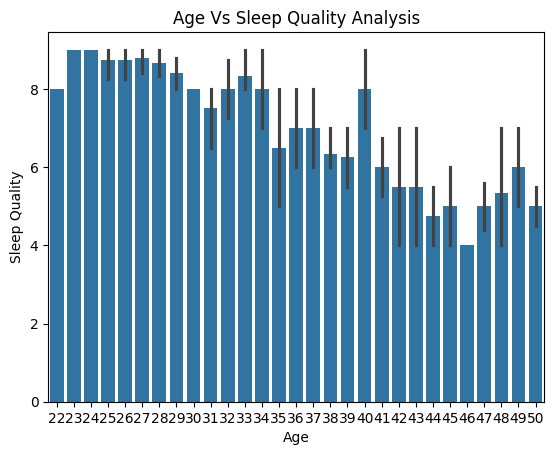

In [24]:
plt.Figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data=df)
plt.title("Age Vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

plot  also saying that with age sleep quality is decreasing'
>

In [25]:
from sklearn.linear_model import LinearRegression 

In [26]:
age_sleep_quality_model=LinearRegression()
x=df[["Age"]] #this is a set of rows
y=df['Sleep Quality']
age_sleep_quality_model.fit(x,y)

LinearRegression()

In [27]:
age_sleep_quality_model.intercept_

13.268812023190646

In [28]:
age_sleep_quality_model.coef_

array([-0.17408531])

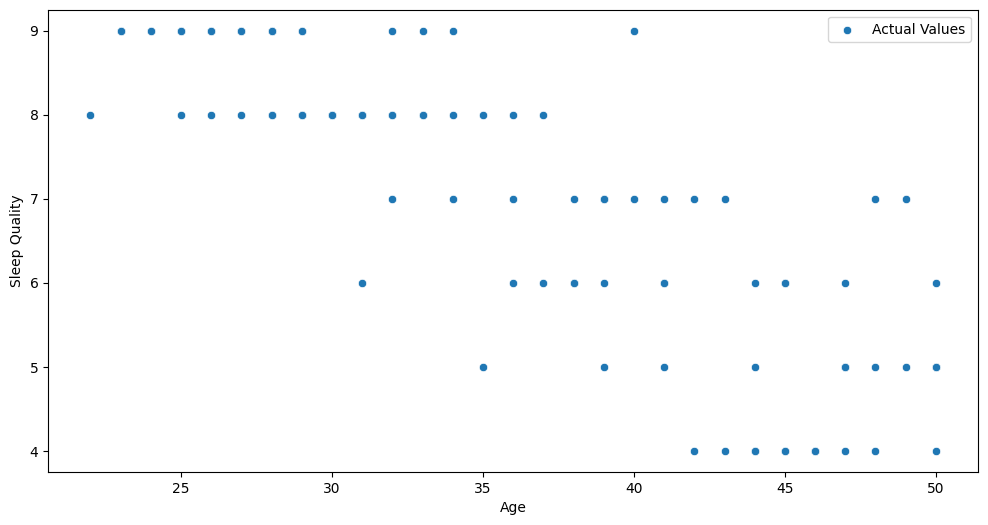

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',label='Actual Values',data=df)
plt.show()

In [31]:
age_sleep_quality_prediction=age_sleep_quality_model.predict(x)

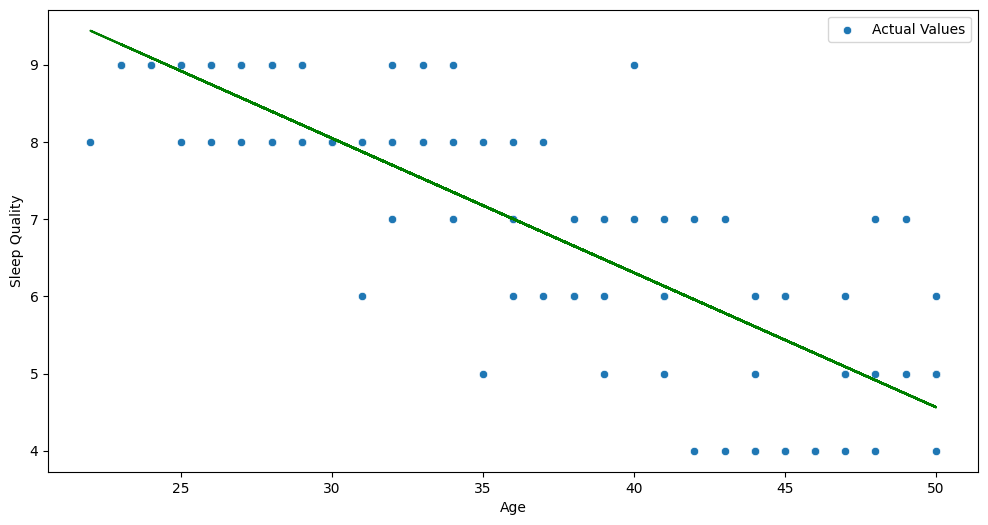

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',label='Actual Values',data=df)
plt.plot(x,age_sleep_quality_prediction,color='green',label="predicted values")
plt.show()

#Gender wise sleep quality
====

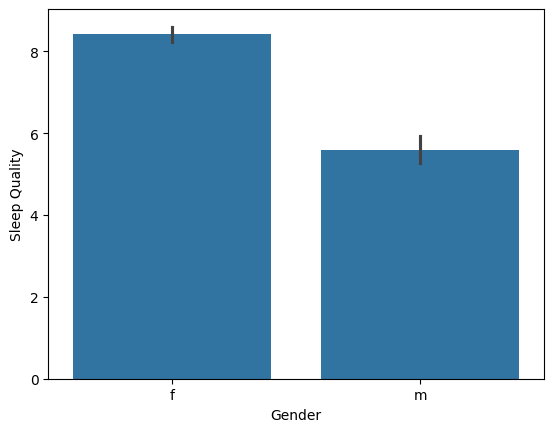

In [36]:
sns.barplot(x='Gender',y='Sleep Quality',data=df)
plt.show()

Sleep Quality of Femal is better as compared to male


Physical Activity vs Sleep Quality
==============

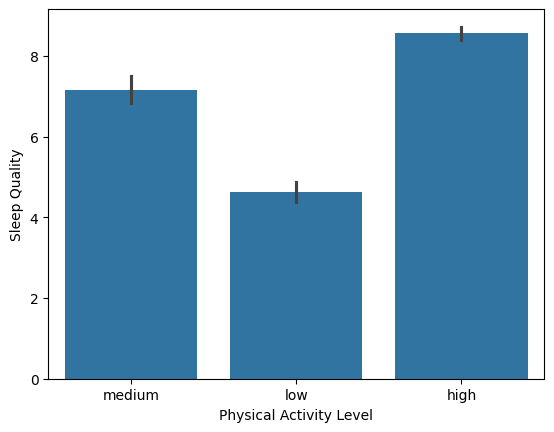

In [39]:
sns.barplot(x='Physical Activity Level',y='Sleep Quality',data=df)
plt.show()

In [40]:
mappingdata={'low':1,'medium':2,'high':3}
df['Physical Activity Level']=df['Physical Activity Level'].map(mappingdata)

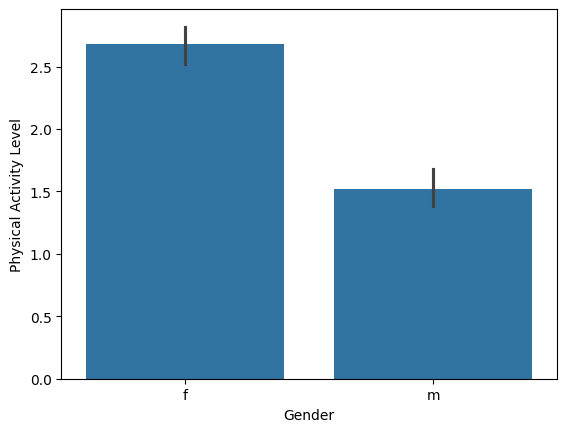

In [41]:
sns.barplot(x='Gender',y='Physical Activity Level',data=df)
plt.show()

## Hypothesis

We hypothesize that **females are doing more physical activity than males** and also that **females have better sleep quality**.

To conclude this hypothesis, we need to perform **statistical testing**.  
For this, we use **t-statistics** and **p-statistics**.

---

### 1) **T-statistic**

The **t-statistic** measures how far your sample mean is from the population mean (or hypothesized value), in terms of **standard errors**.

The formula for the one-sample t-statistic is:

\[
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
\]

Where:  
- \(\bar{x}\) = sample mean  
- \(\mu_0\) = population mean under the null hypothesis  
- \(s\) = sample standard deviation  
- \(n\) = sample size  

---

### 2) **P-statistic (P-value)**

The **p-value** is the probability of observing your data (or something more extreme) **assuming the null hypothesis is true**.

Mathematically:

\[
p = P(T \geq |t_{\text{observed}}| \;|\; H_0 \ \text{is true})
\]

Where \(T\) follows a **t-distribution** with the appropriate degrees of freedom.

**Interpretation:**
- If \(p \leq \alpha\) → **Reject the null hypothesis** (strong evidence against \(H_0\))  
- If \(p > \alpha\) → **Fail to reject the null hypothesis** (weak evidence against \(H_0\))


In [42]:
from scipy import stats


In [44]:
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender']=='f']['Sleep Quality']


phyical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
phyical_activity_females=df[df['Gender']=='f']['Physical Activity Level']

t and p value for sleep Quality vs Gender & Physical Activity vs Gender


In [47]:
t_sleep_quality,p_sleep_quality=stats.ttest_ind(sleep_quality_males,sleep_quality_females)
print(f"t_stats value for Sleep Quality Vs Gender :{t_sleep_quality:.2f}")
print(f"p_stats value for Sleep Quality Vs Gender :{p_sleep_quality:.2f}")


t_stats value for Sleep Quality Vs Gender :-14.32
p_stats value for Sleep Quality Vs Gender :0.00


 There is a statistically significant difference in sleep quality between males and females, with females having significantly better sleep quality than males in the dataset.

In [48]:
t_sleep_quality,p_sleep_quality=stats.ttest_ind(phyical_activity_males,phyical_activity_females)
print(f"t_stats value for Sleep Quality Vs Gender :{t_sleep_quality:.2f}")
print(f"p_stats value for Sleep Quality Vs Gender :{p_sleep_quality:.2f}")

t_stats value for Sleep Quality Vs Gender :-10.98
p_stats value for Sleep Quality Vs Gender :0.00


 From Here We can't ignore that physical activity level or female is more than male in our dataset

# **Time of SLeep & waking up vs Sleep Quality**

In [49]:
df['Bedtime'].head


<bound method NDFrame.head of 0     23:00
1     00:30
2     22:45
3     01:00
4     23:30
      ...  
95    00:45
96    23:15
97    01:30
98    22:15
99    00:30
Name: Bedtime, Length: 100, dtype: object>

In [50]:
df['Wake-up Time'].head

<bound method NDFrame.head of 0     06:30
1     07:00
2     06:45
3     06:30
4     07:00
      ...  
95    07:15
96    06:15
97    07:00
98    06:45
99    07:00
Name: Wake-up Time, Length: 100, dtype: object>

i need to conver into date time as they are in string I can't do anything without this ...

In [53]:
def sleep_time_helper(str_time):
    h=str_time.split(":")[0]
    m=str_time.split(":")[1]
 
    return int(h)+int(m)/60 #total hours

In [54]:
df['Bedtime']=df['Bedtime'].apply(sleep_time_helper)
df['Wake-up Time']=df['Wake-up Time'].apply(sleep_time_helper)

In [57]:
df['Bedtime'].head()
df['Wake-up Time'].head()

0    6.50
1    7.00
2    6.75
3    6.50
4    7.00
Name: Wake-up Time, dtype: float64

In [58]:
df['Sleep Duration Hours']=(df['Wake-up Time']-df['Bedtime'])%24
df['Sleep Duration Hours'].head()

0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

In [59]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


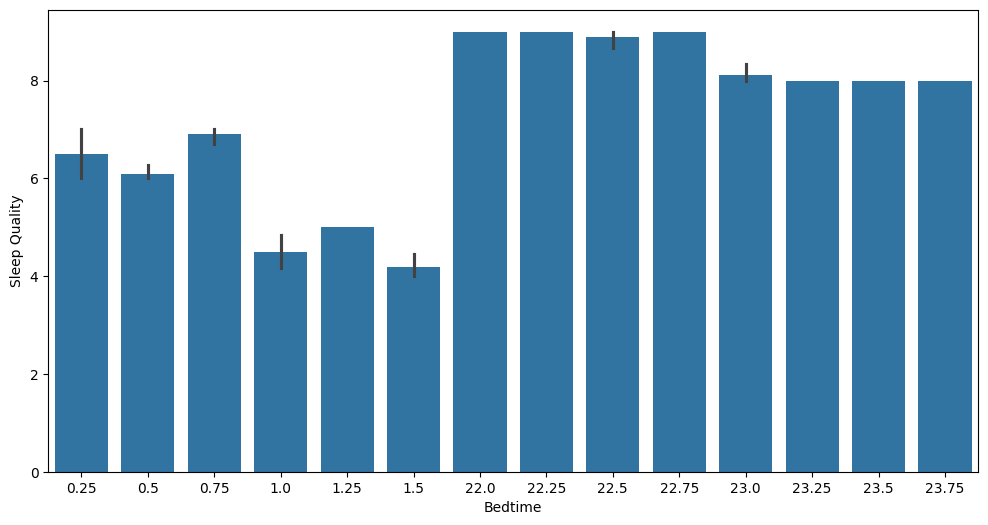

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime' ,y='Sleep Quality',data=df)
plt.show()

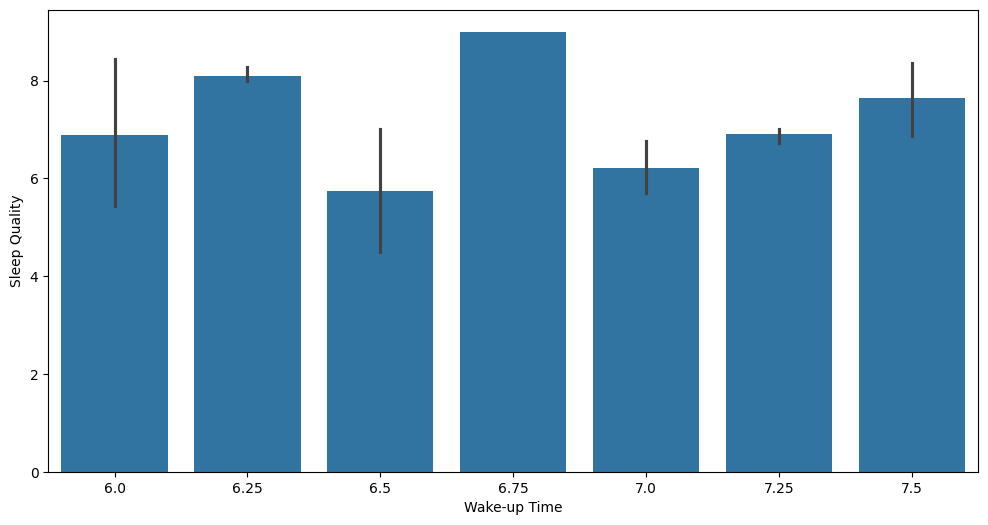

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time' ,y='Sleep Quality',data=df)
plt.show()

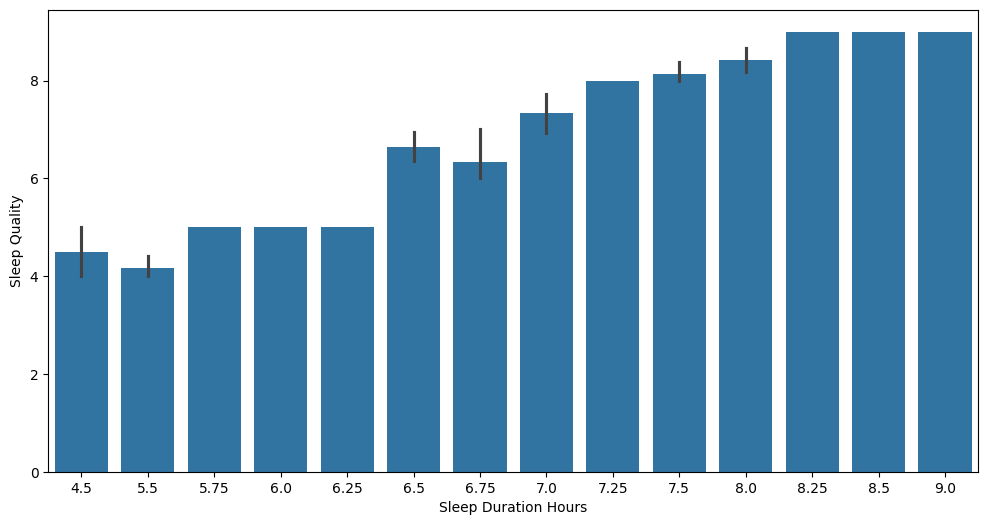

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sleep Duration Hours',y='Sleep Quality',data=df)
plt.show()

In [70]:
sleep_duration_queality_model=LinearRegression()
x=df[['Sleep Duration Hours']]
y=df['Sleep Quality']
sleep_duration_queality_model.fit(x,y)

LinearRegression()

In [71]:
sleep_duration_queality_model.coef_

array([1.36940999])

In [72]:
sleep_duration_queality_model.intercept_

-2.575599349763152

In [73]:
prediction=sleep_duration_queality_model.predict(x)

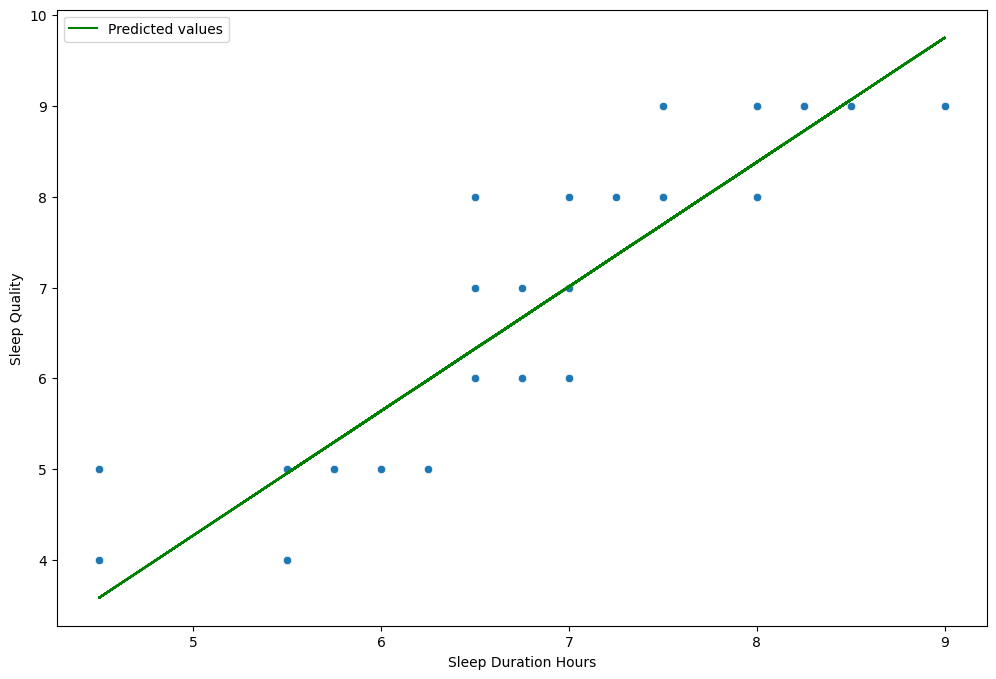

In [78]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Sleep Duration Hours',y='Sleep Quality',data=df)
plt.plot(x,prediction,color='green',label='Predicted values')
plt.legend()
plt.show()

Effect Of Sleep disorder vs Sleep Quality

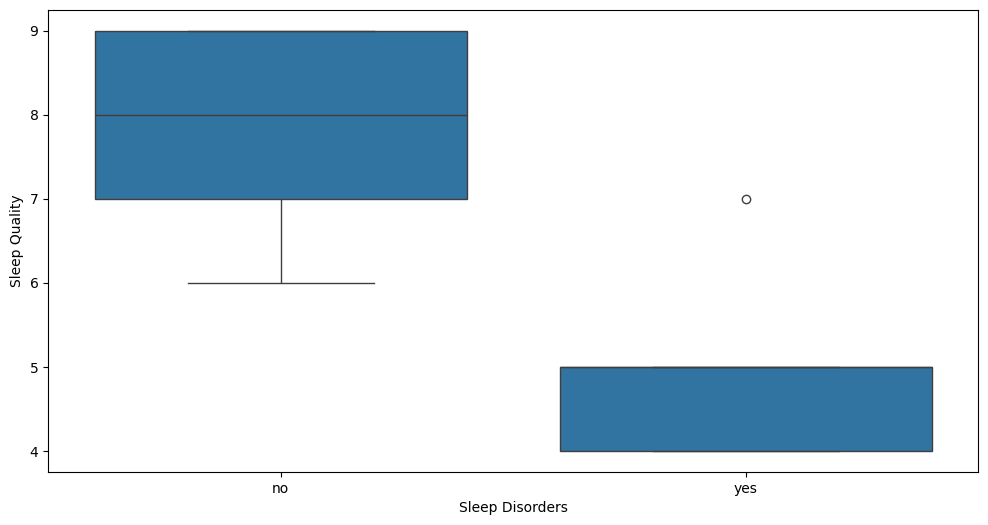

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Sleep Disorders",y='Sleep Quality',data=df)
plt.show()

In [84]:
df_numeric_features=df.select_dtypes(include=['int32','float64','int64'])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


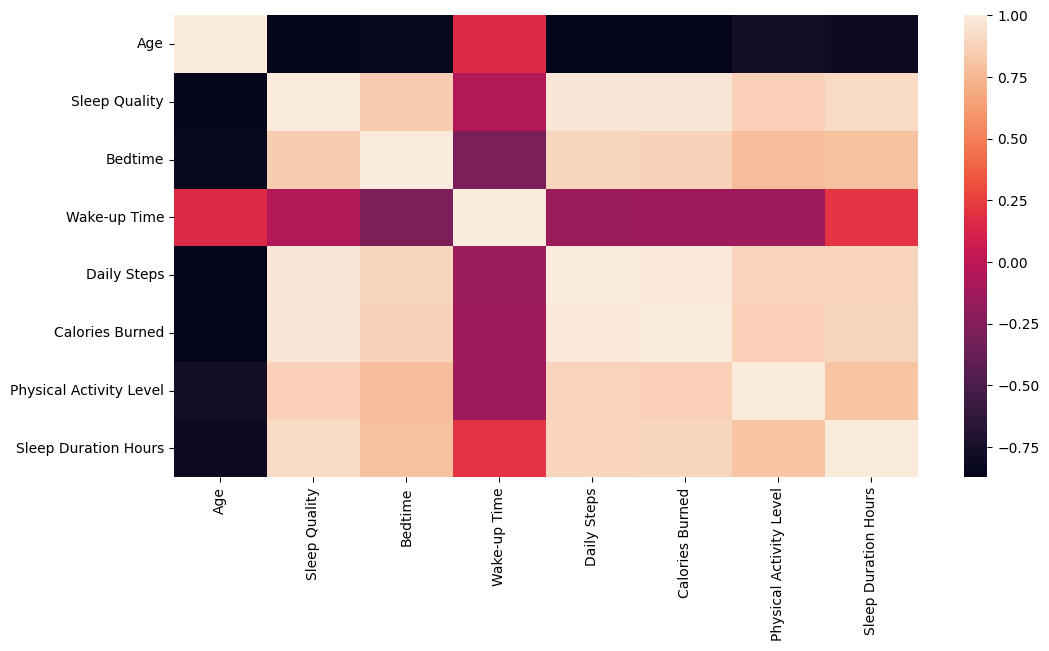

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_features.corr())
plt.show()